In [1]:
!python --version

Python 3.10.13


In [13]:
!pip install pyautogen
!pip install yfinance

In [14]:
import autogen
import yfinance as yf

In [11]:
config_list = [
    {
        'model': 'KK-GPT-4OH',
        'api_key': 'xxxxxxx',
        'base_url': 'xxxxxxx',
        'api_type': 'azure',
        'api_version': '2024-02-15-preview',
    }
]

In [21]:
# create an AssistantAgent named "assistant"
assistant = autogen.AssistantAgent(
    name="assistant",
    llm_config={
        "seed": 42,  # seed for caching and reproducibility
        "config_list": config_list,  # a list of OpenAI API configurations
        "temperature": 0,  # temperature for sampling
    },  # configuration for autogen's enhanced inference API which is compatible with OpenAI API
)
# create a UserProxyAgent instance named "user_proxy"
user_proxy = autogen.UserProxyAgent(
    name="user_proxy",
    human_input_mode="NEVER",
    max_consecutive_auto_reply=10,
    is_termination_msg=lambda x: x.get("content", "").rstrip().endswith("TERMINATE"),
    code_execution_config={
        "work_dir": "coding",
        "use_docker": False,  # set to True or image name like "python:3" to use docker
    },
)
# the assistant receives a message from the user_proxy, which contains the task description
user_proxy.initiate_chat(
    assistant,
    message="""What date is today? Do a Bivariate Analysis of Google Stock since the beginning of the year""",
)

user_proxy (to assistant):

What date is today? Do a Bivariate Analysis of Google Stock since the beginning of the year

--------------------------------------------------------------------------------


assistant (to user_proxy):

To perform the requested tasks, we need to follow these steps:

1. Get the current date.
2. Download Google stock data since the beginning of the year.
3. Perform a bivariate analysis on the stock data.

Let's start with step 1: Get the current date.

```python
from datetime import datetime

# Get the current date
current_date = datetime.now().strftime("%Y-%m-%d")
print(f"Today's date is: {current_date}")
```

Please execute the above code to get the current date. Once we have the current date, we can proceed to download the Google stock data and perform the bivariate analysis.

--------------------------------------------------------------------------------

>>>>>>>> EXECUTING CODE BLOCK 0 (inferred language is python)...
user_proxy (to assistant):

exitcode: 0 (execution succeeded)
Code output: 
Today's date is: 2024-06-25


--------------------------------------------------------------------------------
assistant (to user_proxy):

Great! Now that we have 

ChatResult(chat_id=None, chat_history=[{'content': 'What date is today? Do a Bivariate Analysis of Google Stock since the beginning of the year', 'role': 'assistant'}, {'content': 'To perform the requested tasks, we need to follow these steps:\n\n1. Get the current date.\n2. Download Google stock data since the beginning of the year.\n3. Perform a bivariate analysis on the stock data.\n\nLet\'s start with step 1: Get the current date.\n\n```python\nfrom datetime import datetime\n\n# Get the current date\ncurrent_date = datetime.now().strftime("%Y-%m-%d")\nprint(f"Today\'s date is: {current_date}")\n```\n\nPlease execute the above code to get the current date. Once we have the current date, we can proceed to download the Google stock data and perform the bivariate analysis.', 'role': 'user'}, {'content': "exitcode: 0 (execution succeeded)\nCode output: \nToday's date is: 2024-06-25\n", 'role': 'assistant'}, {'content': 'Great! Now that we have the current date, we can proceed to downloa

In [22]:
# followup of the previous question
user_proxy.send(
    recipient=assistant,
    message="""Plot a chart of this and save to google_analysis.png.""",
)

user_proxy (to assistant):

Plot a chart of this and save to google_analysis.png.

--------------------------------------------------------------------------------
assistant (to user_proxy):

To plot the chart and save it as `google_analysis.png`, we need to modify the script slightly to include the saving functionality. Here is the updated script:

```python
# filename: google_stock_analysis.py

import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Get the current date
current_date = datetime.now().strftime("%Y-%m-%d")

# Define the start date (beginning of the year)
start_date = f"{datetime.now().year}-01-01"

# Download Google stock data
ticker = "GOOGL"
data = yf.download(ticker, start=start_date, end=current_date)

# Check if data is available
if data.empty:
    print("No data found for the specified date range.")
else:
    # Perform bivariate analysis
    # Plotting Closing Price vs Volume
    plt.figure(f

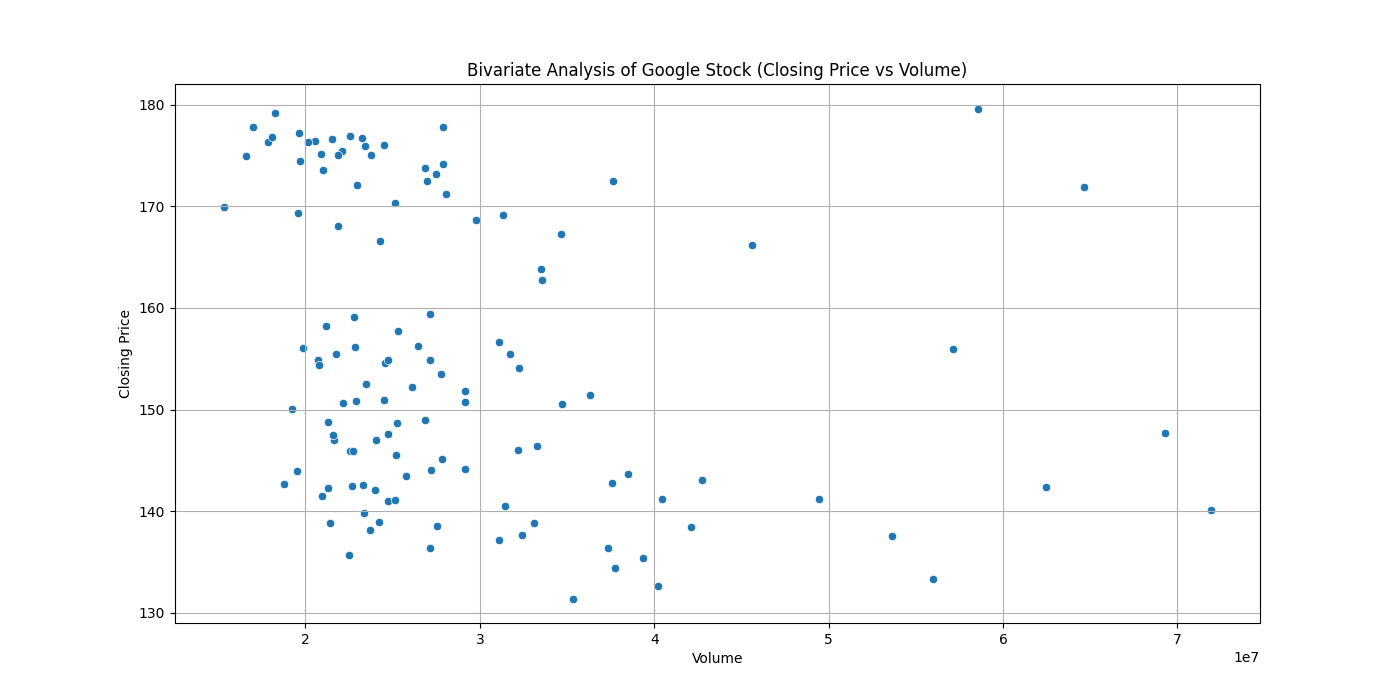

In [20]:
from IPython.display import Image

Image(filename='coding/google_analysis.png')